### Iris Dataset: Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("rainbow")
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/Iris.csv'
df = pd.read_csv(path)

df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'], dtype='object')

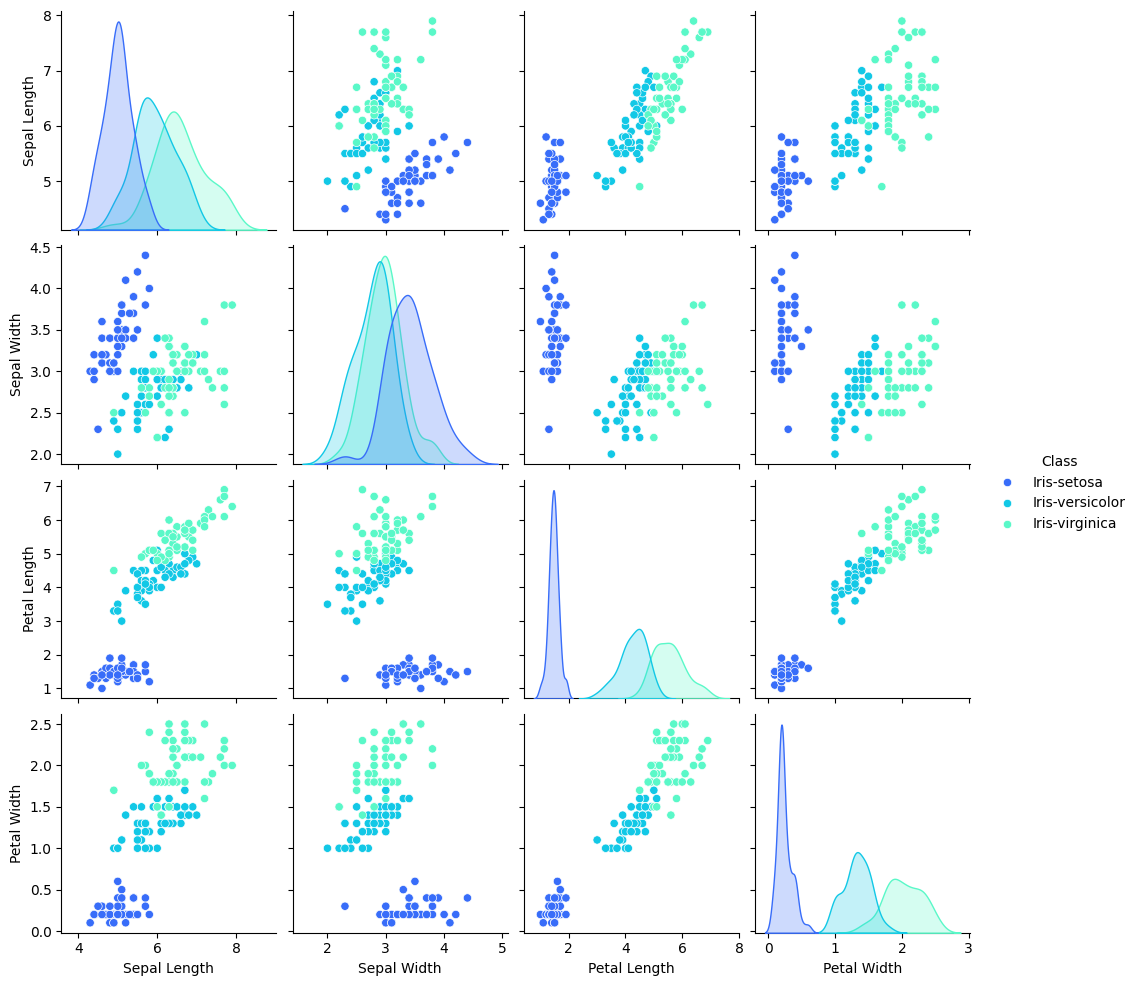

In [5]:
sns.pairplot(df,hue='Class');

<Axes: xlabel='Class', ylabel='count'>

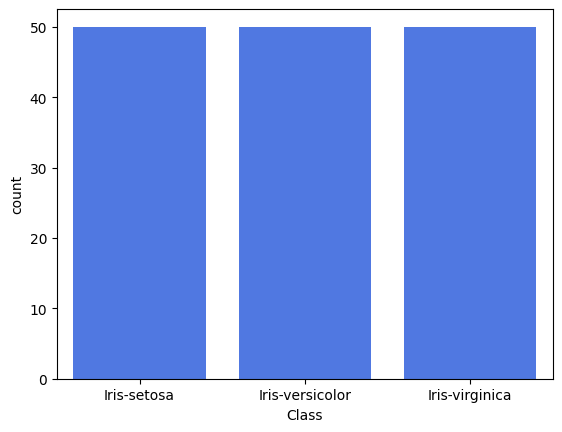

In [6]:
sns.countplot(x = 'Class', data = df)

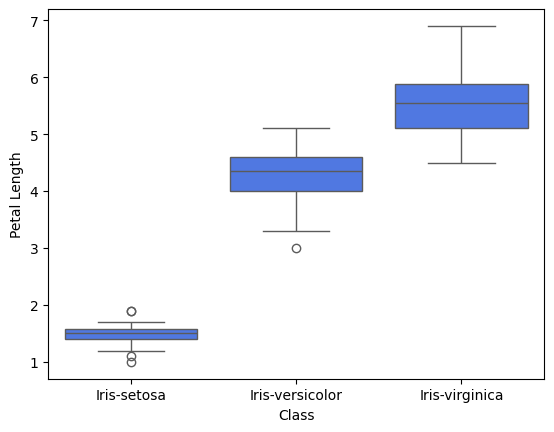

In [7]:
sns.boxplot(x= 'Class',y = 'Petal Length', data = df);

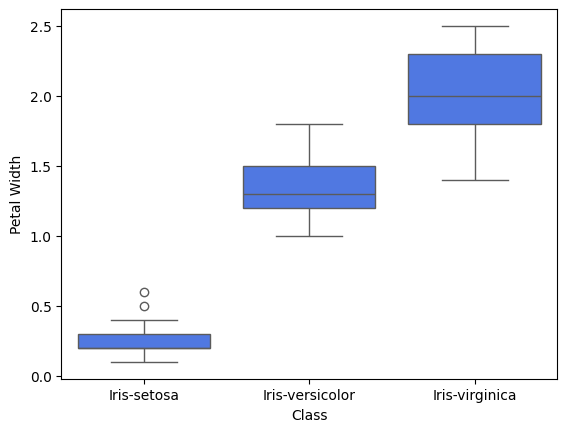

In [8]:
sns.boxplot(x= 'Class',y = 'Petal Width', data = df);

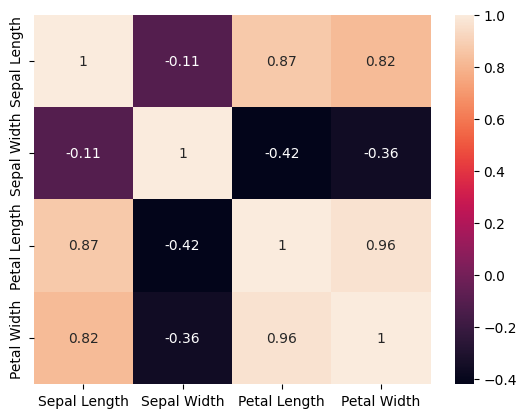

In [9]:
TARGET = 'Class'
df_app = df.drop(columns=[TARGET]) # is a Matrix
sns.heatmap(df_app.corr(), annot=True);

In [10]:
X = df.drop('Class',axis=1) #features
y = df['Class'] #target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=200,max_depth=3)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [13]:
y_pred = model_rfc.predict(X_test)
model_rfc.feature_importances_

array([0.08515771, 0.00922887, 0.43658074, 0.46903268])

<BarContainer object of 4 artists>

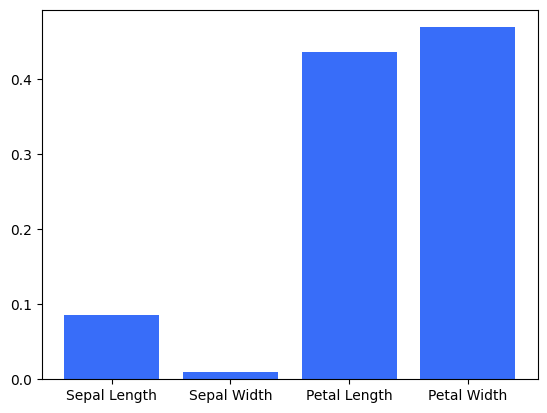

In [14]:
importance = model_rfc.feature_importances_

plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

In [15]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'], dtype='object')

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]])

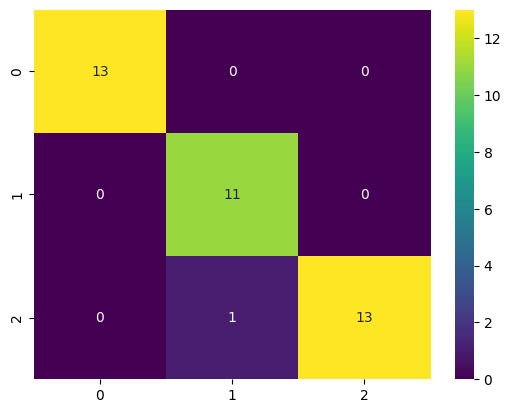

In [17]:
sns.heatmap(cm, annot=True,fmt=".0f",cmap='viridis');

In [18]:
model_rfc.score(X_train,y_train)

0.9821428571428571

In [19]:
model_rfc.score(X_test,y_test)

0.9736842105263158

### Classification Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### ROC Curve in Multiclass

In the iris dataset, we have 3 classes of flowers and 4 features in total. So the classification problem is not a binary case anymore since we have 3 classes. However, the following code will estimate and plot the ROC curve for our multi-class classification problem.
To this end, the model will be used for class 1 vs class 2, class 2 vs class 3 and class 1 vs class 3. So, we have 3 cases at the end and within each case, the bias will be varied in order to get the ROC curve of the given case — so, 3 ROC curves as output.

In [21]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_iris
import pandas as pd

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/Iris.csv'

df = pd.read_csv(path)
X = df.drop('Class',axis=1) #features

class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Class'] = df['Class'].map(class_mapping) #class must be integer!!
y = df['Class'] #target


# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=42
                                                    )

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

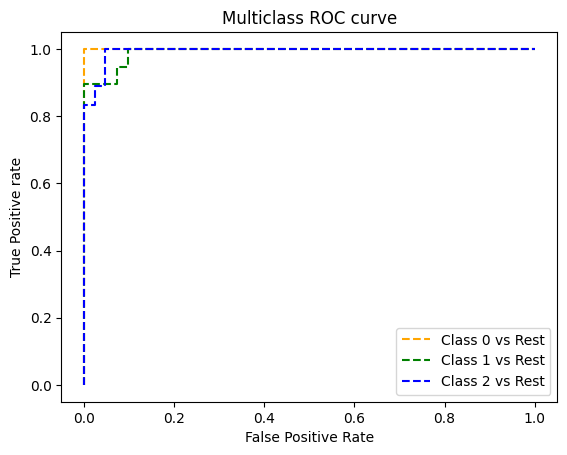

In [22]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);